Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mymoviedb.csv", lineterminator = '\n')

EDA- Exploratory Data Analysis

In [3]:
df.head() #First 5 rows

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.tail() #last 5 rows

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


In [5]:
df.info() #column info: types, non-nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
df.describe() #stats for numeric columns

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
df.columns #list of column names

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [8]:
df. shape #(rows, columns) 

(9827, 9)

Explor columns

In [9]:
df['Title'].head()

0    Spider-Man: No Way Home
1                 The Batman
2                    No Exit
3                    Encanto
4             The King's Man
Name: Title, dtype: object

In [10]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [12]:
df.duplicated().sum()

np.int64(0)

Our Dataset has no duplicate rows

Data Cleaning and Preprocessing 

In [14]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Casting column

In [15]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


Only year

In [16]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

Check the data is change or not 

In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [18]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [19]:
df.isnull() 

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9822,False,False,False,False,False,False,False,False,False
9823,False,False,False,False,False,False,False,False,False
9824,False,False,False,False,False,False,False,False,False
9825,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum() 

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

Dropping the columns

In [21]:
#making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [22]:
#dropping columns
df.drop(cols, axis=1, inplace=True)

In [23]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Specific rows and columns check

In [25]:
df.loc[3, 'Title']

'Encanto'

In [26]:
df.loc[ 0:5, ["Release_Date", "Title", "Vote_Average"]]

,Release_Date,Title,Vote_Average
0,2021,Spider-Man: No Way Home,8.3
1,2022,The Batman,8.1
2,2022,No Exit,6.3
3,2021,Encanto,7.7
4,2021,The King's Man,7.0
5,2022,The Commando,6.6


In [27]:
df[df['Vote_Average']>7].head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
9,2021,Eternals,1537.406,4726,7.2,Science Fiction
11,2021,My Hero Academia: World Heroes' Mission,1485.064,100,7.3,"Animation, Action, Fantasy, Adventure"


In [28]:
df[(df['Vote_Average']>6 ) & (df['Release_Date'] >2020)].head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categorizing Vote_Average column

We would cut the Vote_Average values amd make 4 categories: POPULAR , AVERAGE, BELOW_AVG, NOT_POPULAR to describe it more using Catigorize col() function provided above

In [29]:
#user define function
def catigorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop') #cut fun. help in labels
    return df

In [30]:
#define labels for edges
labels = ['Not_Popular', 'Below_Avg', 'Average', 'Popular']

#categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)

#confirming changes
df['Vote_Average'].unique()

['Popular', 'Below_Avg', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Avg' < 'Average' < 'Popular']

In [31]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [32]:
#exploring columns
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular    2467
Popular        2450
Average        2412
Below_Avg      2398
Name: count, dtype: int64

In [33]:
#dropping NaNs
df.dropna(inplace = True)

In [34]:
#confirming
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [35]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [36]:
#split the strings into lists
df['Genre'] = df['Genre'].str.split(',')

In [37]:
#explode the lists
df = df.explode('Genre').reset_index(drop=True)

In [38]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [39]:
#casting column into category
df['Genre'] = df['Genre'].astype('category')

In [40]:
#confirming chnages
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 750.3+ KB


In [42]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             38
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551 rows to dig into during our analysis

Data Visualization

Here, we'd use Matplotlib and seaborn for making some information visuals to gain insights about our data

In [43]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

Q1: How many Netflix titles were released each year?

C:\Users\tyagi\AppData\Local\Temp\ipykernel_13644\2130285959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Release_Date", palette="Set2")


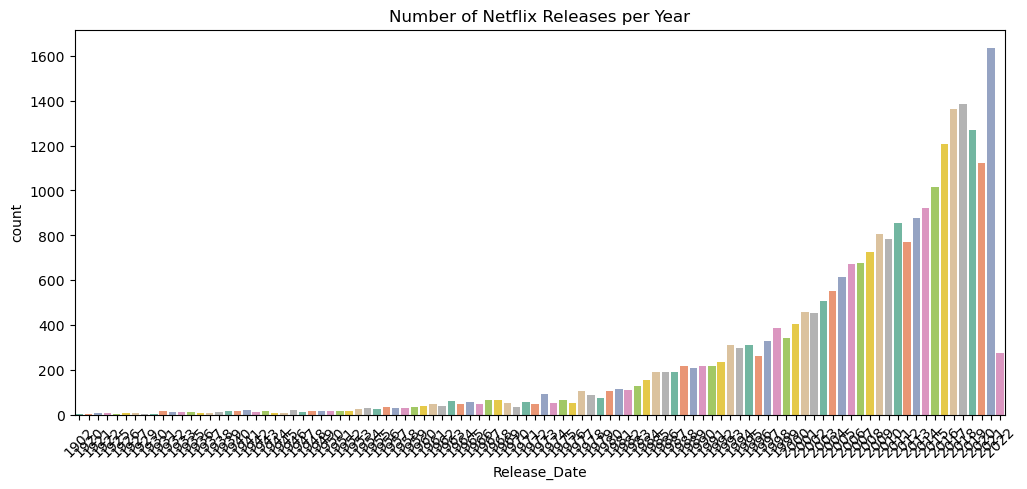

In [44]:
#Matplotlib Data Visualization

plt.figure(figsize=(12,5))
sns.countplot(data=df, x="Release_Date", palette="Set2")
plt.xticks(rotation=45)
plt.title("Number of Netflix Releases per Year")
plt.show()

Q2: What is the distribution of ratings (Vote_Average) of Netflix titles?

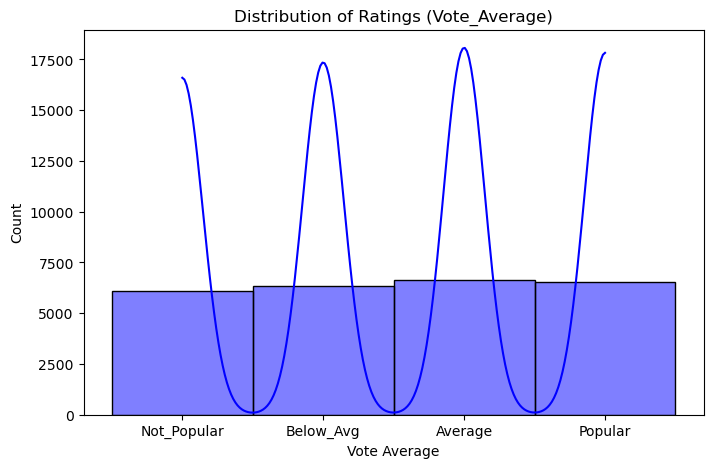

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df['Vote_Average'], bins=15, kde=True, color="blue")
plt.title("Distribution of Ratings (Vote_Average)")
plt.xlabel("Vote Average")
plt.ylabel("Count")
plt.show()

Q3: Which are the top 10 most popular Netflix titles?

C:\Users\tyagi\AppData\Local\Temp\ipykernel_13644\2300756785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_popular, x="Popularity", y="Title", palette="viridis")


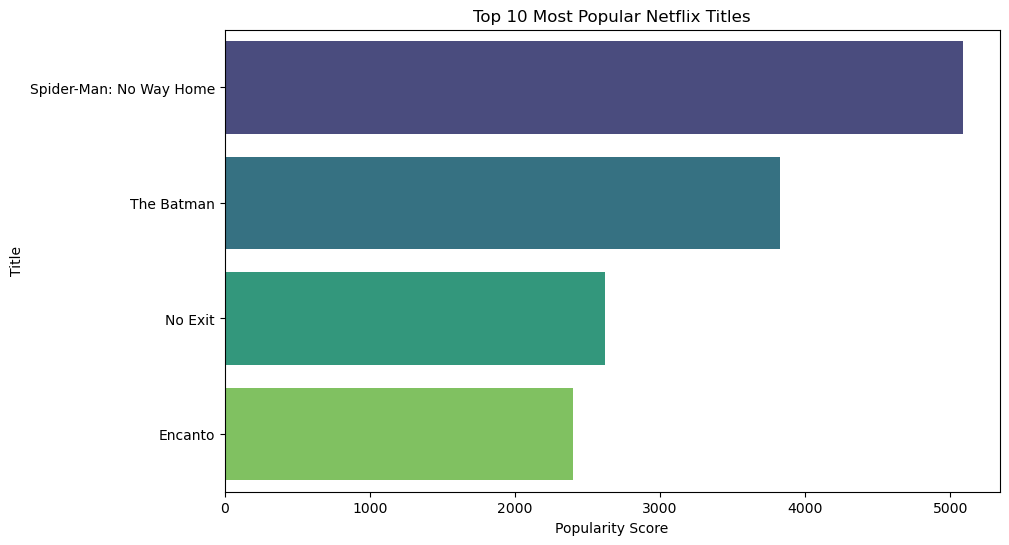

In [46]:
top_popular = df.nlargest(10, 'Popularity')

plt.figure(figsize=(10,6))
sns.barplot(data=top_popular, x="Popularity", y="Title", palette="viridis")
plt.title("Top 10 Most Popular Netflix Titles")
plt.xlabel("Popularity Score")
plt.ylabel("Title")
plt.show()

Q4: Which are the top 10 most frequent genres on Netflix?

In [47]:
#showing stats.on genre columns
df['Genre'].describe()

count         25552
unique           38
top        Thriller
freq           1960
Name: Genre, dtype: object

C:\Users\tyagi\AppData\Local\Temp\ipykernel_13644\144345748.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")


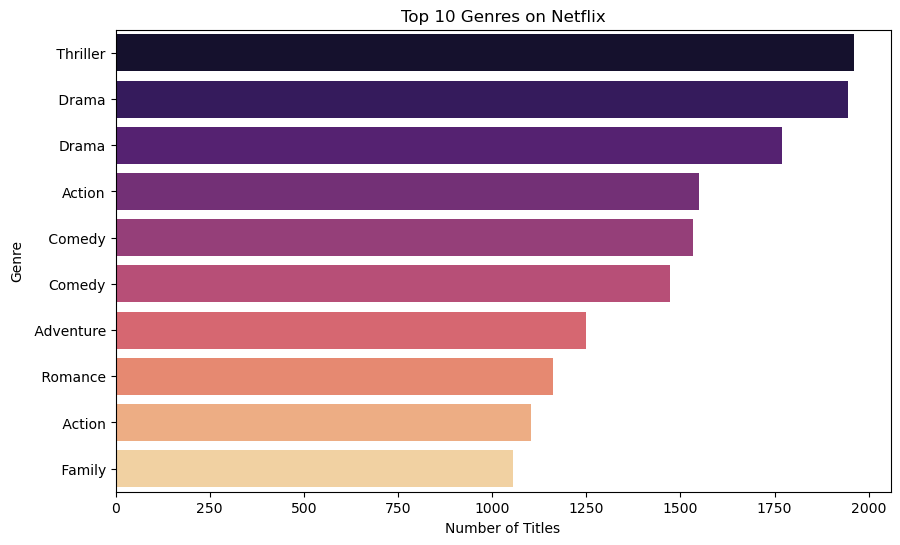

In [48]:
# Explode genres
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop=True)

top_genres = df['Genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

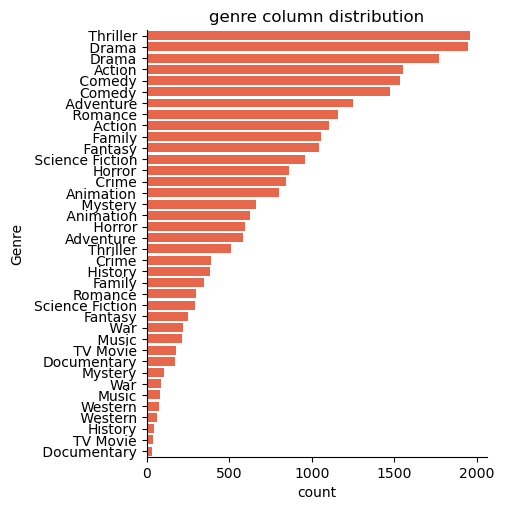

In [49]:
#what is the most frequent genre in the dataset ?

#visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#FF5733')
plt.title('genre column distribution')
plt.show()

Q5: what geners has highest votes?

C:\Users\tyagi\AppData\Local\Temp\ipykernel_13644\2576007356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


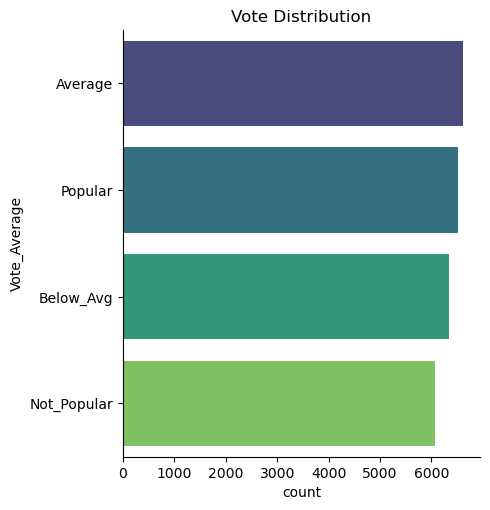

In [50]:
#visualizing vote_average column

sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    order=df['Vote_Average'].value_counts().index,
    palette='viridis'   # can be 'Set2', 'coolwarm', 'magma', 'plasma', etc.
)
plt.title('Vote Distribution')
plt.show()

Q6: What movie got the lowest popularity? what's its genre?

C:\Users\tyagi\AppData\Local\Temp\ipykernel_13644\344599070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_popular, x="Popularity", y="Title", palette="Reds")


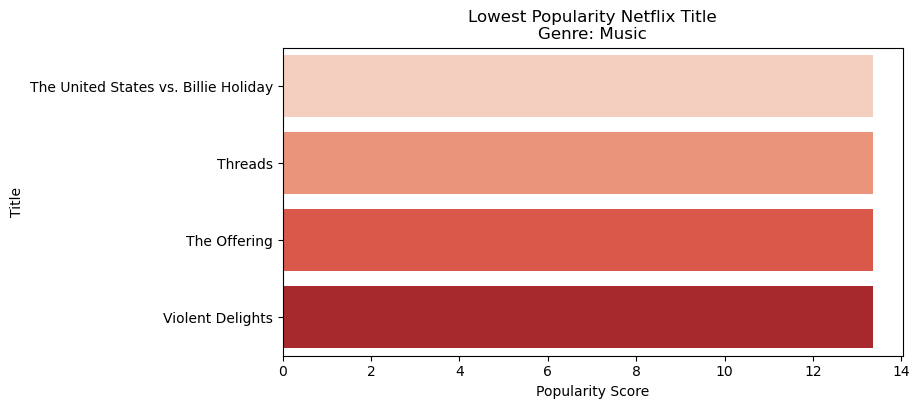

In [54]:
lowest_popular = df.nsmallest(10, 'Popularity')

plt.figure(figsize=(8,4))
sns.barplot(data=lowest_popular, x="Popularity", y="Title", palette="Reds")
plt.title(f"Lowest Popularity Netflix Title\nGenre: {lowest_popular['Genre'].values[0]}")
plt.xlabel("Popularity Score")
plt.ylabel("Title")
plt.show()

Q7: which year has the most filmmed movies?

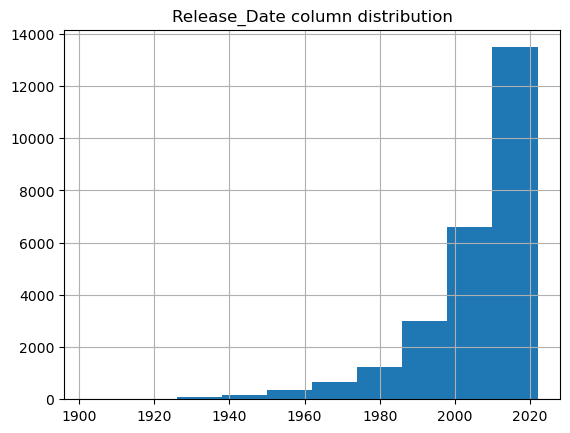

In [55]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

QUESTION 1- How Many Netflix Titles Were Released Each Year?
ANSWER 1-   1600+

QUESTION 2- What Is The Distribution Of Ratings (Vote_Average) Of Netflix Titles?
ANSWER 2-   17500+

QUESTION 3- Which Are The Top 10 Most Popular Netflix Titles?
ANSWER 3-   Spider-Man: No Way Home, The Batman, No Exit, Encanto Etc.

#Question- What movie got the highest popularity ? what's its genre?
#Answer- Spider-Man: No Way Home. and Genre is Action, Adventure, Science Fiction

QUESTION 4- Which Are The Top 10 Most Frequent Genres On Netflix?
ANSWER 4-   Thriller, Drama, Drama, Action, Comedy Etc 

#Question- What is the most frequent genre in the dataset ?
#Answer-   Drama 

QUESTION 5- What Geners Has Highest Votes?
ANSWER 5-   Average  

QUESTION 6- What Movie Got The Lowest Popularity? What's Its Genre?
ANSWER 6-   The United States vs. Billie Holiday.and Genre is Music, Drama, History

QUESTION 7- Which Year Has The Most Filmmed Movies?
ANSWER 7-   2020